# Context

An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]:

A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg]

T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg]

S - Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

*Dosages follow a 1:1 ratio to ensure validity
*Happy or Sad memories were primed 10 minutes prior to testing
*Participants tested every day for 1 week to mimic addiction

Building the Case:
Obstructive effects of Benzodiazepines (Anti-Anxiety Medicine):

Long term adverse effects on Long Term Potentiation of synapses, metacognition and memory recall ability
http://www.jstor.org/stable/43854146
Happy Memories:

research shown positive memories to have a deeper and greater volume of striatum representation under an fMRI
https://www.sciencedirect.com/science/article/pii/S0896627314008484
Sad Memories:

research shown sad memories invokes better memory recall for evolutionary purpose whereas, happy memories are more susceptible to false memories
http://www.jstor.org/stable/40064315
Participants - all genders above 25+ years old to ensure a fully developed pre-frontal cortex, a region responsible for higher level cognition and memory recall.

# QUESTIONS:

1.) How does anti-anxiety medicine affect you differently by age?
---

2.) Is there a level of plateauing in effectiveness of anti-anxiety medicine - if so, at what point?
---

3.) Effect of anti-anxiety medicine on memory recall?
---

4.) Effectiveness of placebos in a test environment?
---

# Importing Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating Initial DF

In [11]:
df1 = pd.read_csv('./input/islander_data.csv')
df1.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


# Checking out what this data is looking like

Data Types
---

In [12]:
df1.dtypes

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

Nulls
---

In [13]:
df1.isnull().sum()

first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
dtype: int64

Description
---

In [14]:
df1.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


Dataframe
---

In [17]:
df1

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2


# Exploratory Analysis

Breakdown of age
---

In [18]:
df1['age'].value_counts()

37    13
29    12
34    11
35    11
25    10
28    10
27     9
26     7
38     7
40     7
32     7
33     7
52     6
51     6
50     5
49     5
30     5
54     4
36     4
39     4
48     4
42     4
53     3
46     3
45     3
31     3
43     2
47     2
41     2
62     2
56     2
63     2
65     2
68     2
44     2
83     1
80     1
55     1
59     1
60     1
66     1
69     1
72     1
73     1
24     1
Name: age, dtype: int64

Breakdown of the drugs in the dataset, pretty even distribution
---

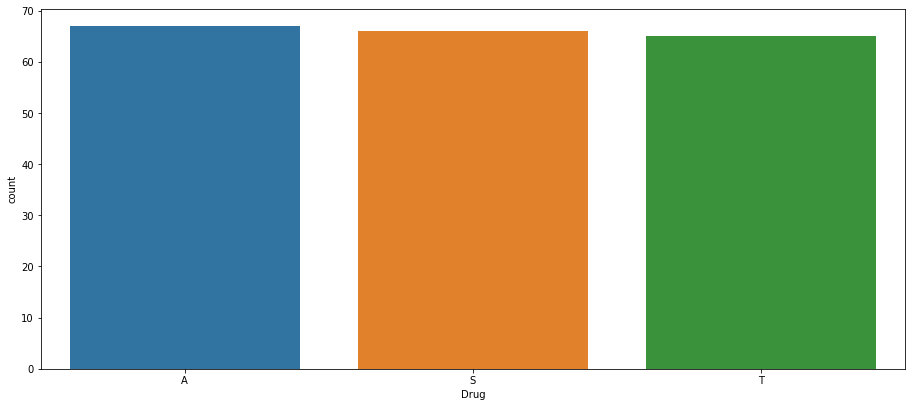

In [32]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Drug', data=df1, ax=ax)
plt.tight_layout()
plt.show()

Average difference in memory score for each drug. Includes all ages and all doses.
---

In [23]:
df1.groupby('Drug')['Diff'].mean()

Drug
A    9.470149
S   -0.171212
T   -0.587692
Name: Diff, dtype: float64

Making a new column for a plot. Avg Diff in memory score for all ages and all doses for each drug

In [33]:
df1['avg_ovr_diff'] = df1.groupby('Drug')['Diff'].transform('mean')
df1['avg_ovr_diff']

0      9.470149
1      9.470149
2      9.470149
3      9.470149
4      9.470149
         ...   
193   -0.587692
194   -0.587692
195   -0.587692
196   -0.587692
197   -0.587692
Name: avg_ovr_diff, Length: 198, dtype: float64

Plot

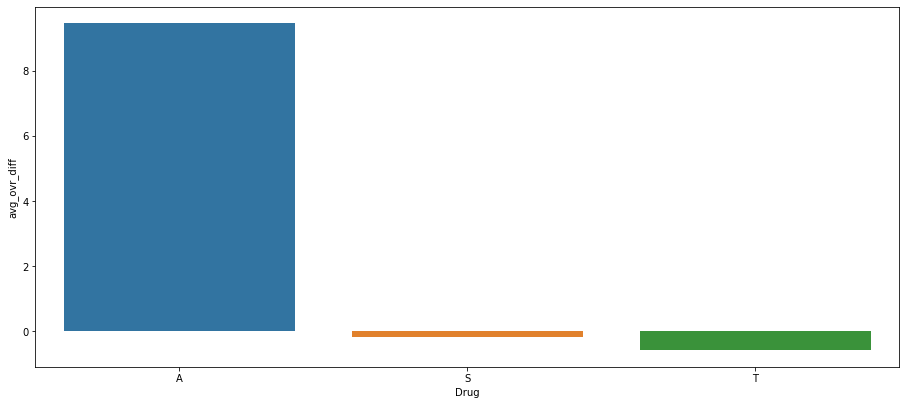

In [31]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df1['Drug'], y=df1['avg_ovr_diff'], ax=ax)
plt.tight_layout()
plt.show()

Time to check out how the drug effects memory by age.
---

Grouping the ages for every 5 years